In [64]:
import sentiment_mod as s
import pandas as pd
from datetime import datetime
import Stock_Market_web_scraper as getData
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
months_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
def plotter(stock_name):
    df,df_price = getData.get_stock_data(stock_name)
    curr_month = datetime.now().month
    
    months_labels = []
    for i in range(1,13):
        months_labels.append(curr_month-i)
    months_dict_temp = {}
    for i,month in zip(months_labels,months_dict.values()):
        months_dict_temp[i] = month
    
    def remove_this_week(text):
        if ('day' in text) or ('week' in text) or ('hour' in text) or ('minute' in text):
            return months_dict[datetime.now().month]
        elif('year' in text):
            return pd.NA
        else:
            month = int(text.split()[0])
            
            if month<datetime.now().month:
                return months_dict_temp[month]
            else:
                month = month-12
                return months_dict_temp[month]
            
    df['dates'] = df['dates'].apply(remove_this_week)
    df.dropna(inplace=True)
    sentiment = []
    for news in tqdm(df['news'],desc = 'Applying Sentiment Analysis'):
        sentiment.append(s.sent(news))
    df['sentiment'] = sentiment

    plot_data = df.groupby('dates',as_index=False).mean()
    
    df_data = pd.DataFrame()
    df_data = pd.merge(plot_data,df_price,on='dates',how='left')
    
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,6), nrows=3, ncols=1)
    fig.canvas.draw()
    print('Pearsons correlation:- ',end='')
    print(stats.pearsonr(df_data['Close'],df_data['sentiment'])[0])
    print('Spearmans correlation:- ',end='')
    print(stats.spearmanr(df_data['Close'],df_data['sentiment'])[0])
    res_string = f"{stats.pearsonr(df_data['Close'],df_data['sentiment'])[0]} {stats.spearmanr(df_data['Close'],df_data['sentiment'])[0]}"
    plt.text(0,0,res_string,bbox=dict(facecolor='red', alpha=0.5))
#     plt.tight_layout()
    order = list(df['dates'].unique())
    order.reverse()
    ax30 = sns.pointplot(plot_data, x='dates', y='sentiment', order=order, ax=ax1)
    ax4 = sns.barplot(plot_data, x='dates', y='sentiment', ax=ax1, order=order)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_title('Sentiment Plot')

    df_price['dates'] = df_price['dates'].map(months_dict)
    ax5 = sns.pointplot(df_price, x='dates', y='Close', order=list(df_price['dates']), ax=ax2)
    ax6 = sns.barplot(df_price, x='dates', y='Close', order=list(df_price['dates']), ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_title('Mean stock price plot')

    
    
    ax300 = sns.lineplot(df_data,x='sentiment',y='Close',ax=ax3)
    ax3.set_title('Stock Price vs Sentiment')
    
    np.set_printoptions(suppress=True)
    print('Correlation matrix:- ')
    print(df_data.corr())
    plt.subplots_adjust(hspace=0.5)
#     plt.suptitle(stock_name)
    return fig,df_data,df,df_price

In [65]:
fig,df_data,df_news,df_price = plotter('reliance')

Extracting Headlines:   0%|          | 0/200 [00:00<?, ?it/s]

Adding Headlines and Dates:   0%|          | 0/1200 [00:00<?, ?it/s]

Applying Sentiment Analysis:   0%|          | 0/1167 [00:00<?, ?it/s]

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

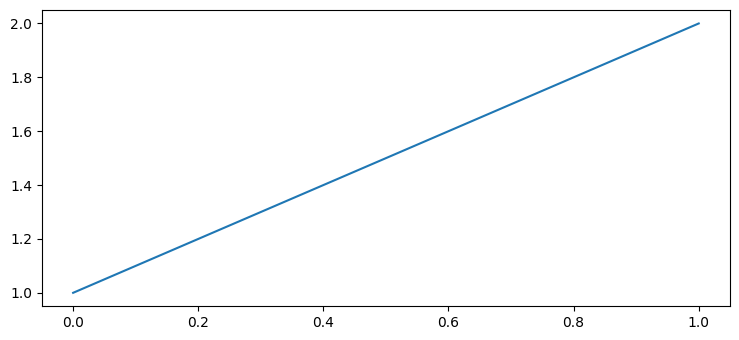

In [12]:
import io
from PIL import Image
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.figure()
plt.plot([1, 2])

img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')

im = Image.open(img_buf)
im.show(title="My Image")

img_buf.close()


In [4]:
from datetime import date, datetime ,time,timedelta

current_date = date.today()
desired_time = time(23, 59, 59)
current_datetime = datetime.combine(current_date, desired_time)
one_year_ago = current_datetime - timedelta(days=365)
timestamp = one_year_ago.timestamp()
timestamp_today = current_datetime.timestamp()
news_url = '?dateFilter=%s,%s'%(int(((timestamp)//1)*1000),int(((timestamp_today)//1)*1000))
news_url

'?dateFilter=1653330599000,1684866599000'

In [5]:
number = 12345.0

# Remove the decimal point from the number
number_int = int(number // 1)

print(number_int)

12345


In [6]:
one_year_ago = datetime.date.today() - timedelta(days=365)
one_year_ago

AttributeError: 'method_descriptor' object has no attribute 'today'

In [ ]:
one_year_ago.timestamp()

In [ ]:
df_data

In [ ]:
neg = df_news[df_news['sentiment']==-1]

In [ ]:
neg = list(neg['news'])

In [ ]:
df_news['sentiment'].value_counts()

In [ ]:
df_news.iloc[0].news

In [ ]:
neg

In [ ]:
# import stock_market_web_scraper_2 as smws2
# df_news_1,df_price_1 = smws2.get_stock_data('adani enterprises')

In [ ]:
import time
import requests 
import io
import hashlib
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException,ElementClickInterceptedException
import goto
from PIL import Image, ImageDraw
import pandas as pd
from datetime import timedelta,datetime,date
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from tqdm.auto import tqdm
import yfinance as yf
from dateutil.relativedelta import relativedelta
pd.options.mode.chained_assignment = None  # Suppress the warning

# def get_stock_data(stock_name):
wd = webdriver.Chrome(executable_path="C:\\Python\\scraping\\chromedriver.exe")

def scroll_to_bottom(wd):
    scroll_count=0
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

search_url = 'https://www.tickertape.in/'
wd.get(search_url)
search_bar = wd.find_element_by_xpath('//*[@id="search-stock-input"]')
search_bar.send_keys('vedanta')
time.sleep(0.8)
search_bar.send_keys(Keys.ENTER)
time.sleep(0.8)
news_url = str(wd.current_url)+'/news?checklist=basic&type=news'
wd.get(news_url)

# progress_bar_1 = tqdm(total=200, desc='Extracting Headlines', unit='iteration')
ticker_name = wd.find_element_by_xpath('//*[@id="app-container"]/div/div/div[1]/div/div[1]/div[2]/span')
ticker_name = ticker_name.text

load_more_button = wd.find_element_by_css_selector('#load-more > button')
target_element = load_more_button
for i in tqdm(range(0,200),desc='Extracting Headlines'):
        # scroll_to_bottom(wd)
        try:
            while not target_element.is_displayed():
                try:
                    wd.execute_script("arguments[0].scrollIntoView();", target_element)
                except NoSuchElementException:
                    break
            try:
                load_more_button.click()
                wd.switch_to.window(wd.window_handles[0])
            except NoSuchElementException:
                break
        except StaleElementReferenceException:
            break
#         time.sleep(0.04)
# progress_bar_1.close()

# progress_bar_2 = tqdm(total=1000, desc='Adding Headlines', unit='iteration')
news_list = []
dates_list = []
pub_list = []

news = wd.find_elements_by_class_name('shave-root')
dates = wd.find_elements_by_class_name('jsx-3953764037.typography-body-regular-xs.news-info.text-tertiary')
# wd.quit()
# dates = wd.find_elements_by_class_name('jsx-3953764037')
# data = wd.find_elements_by_class_name('jsx-3440134818 news-description')
# dates = dates_1.extend(dates)

for i in tqdm(range(0,1200),desc = 'Adding Headlines and Dates'):
    date_text = str(dates[i].text)
    if('year' in date_text):
        continue
    news_list.append(news[i].text)
    date_pub = date_text.split('•')
    dates_list.append(date_pub[0])
    pub_list.append(date_pub[1])
# for i in tqdm(range(0,1200),desc = 'Adding Dates'):
#     date_text = str(dates[i].text)
#     dates_list.append(date_text.split('•')[0])
#     pub_list.append(date_text.split('•')[1])
# # progress_bar_2.close()

# import pandas as pd

def calculate_average_stock_price_per_month(start_date, end_date):
    # Create an empty DataFrame to store the stock prices
    df = pd.DataFrame()
    ticker = ticker_name+'.NS'
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

    df = stock_data

    # Reset the index and keep only the 'Date' and 'Close' columns
    df.reset_index(inplace=True)
    df = df[['Date', 'Close']]

    # Convert the 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month from the 'Date' column
    df['dates'] = df['Date'].dt.to_period('M')

    # Calculate the average stock price per month
    average_prices = df.groupby('dates',as_index=False)['Close'].median()
    average_prices['dates'] = average_prices['dates'].apply(lambda x:x.month)
    return average_prices


stock_dict = {'news':news_list,'dates':dates_list,'publisher':pub_list}
df_news = pd.DataFrame.from_dict(stock_dict)
time_data = list(df_news['dates'])
time_data.reverse()
for i in time_data:
    if 'month' in i:
        diff = i.split()[0]
        break
end_date = date.today()
start_date =  end_date - relativedelta(months=int(diff)) 

df_price = calculate_average_stock_price_per_month(start_date,end_date)    
    
    
# df_news,df_price

# df = get_stock_news('reliance')


In [ ]:
dates[-1].text

In [ ]:
len(dates)

In [ ]:
df_news.groupby('publisher').count()

In [ ]:
len(news)

In [ ]:
df_news

In [ ]:
for i in dates_1[0:30]:
    string = str(i.text)
    date = string.split('•')[0]
    print(date)
    print('------')

In [ ]:
dates_1

In [ ]:
datas = {}
for data in data:
    news = data.split('\n')[1]
    date = data.split('\n')[2]

In [ ]:
len(dates_list)

In [ ]:
len(news_list)

In [ ]:
type(news)

Extracting Headlines:   0%|          | 0/200 [00:00<?, ?it/s]

Adding Headlines and Dates:   0%|          | 0/1200 [00:00<?, ?it/s]

Applying Sentiment Analysis:   0%|          | 0/1165 [00:00<?, ?it/s]

Pearsons correlation:- 0.5539648464359745
Spearmans correlation:- 0.6024527627709778
Correlation matrix:- 
           sentiment     Close
sentiment   1.000000  0.553965
Close       0.553965  1.000000


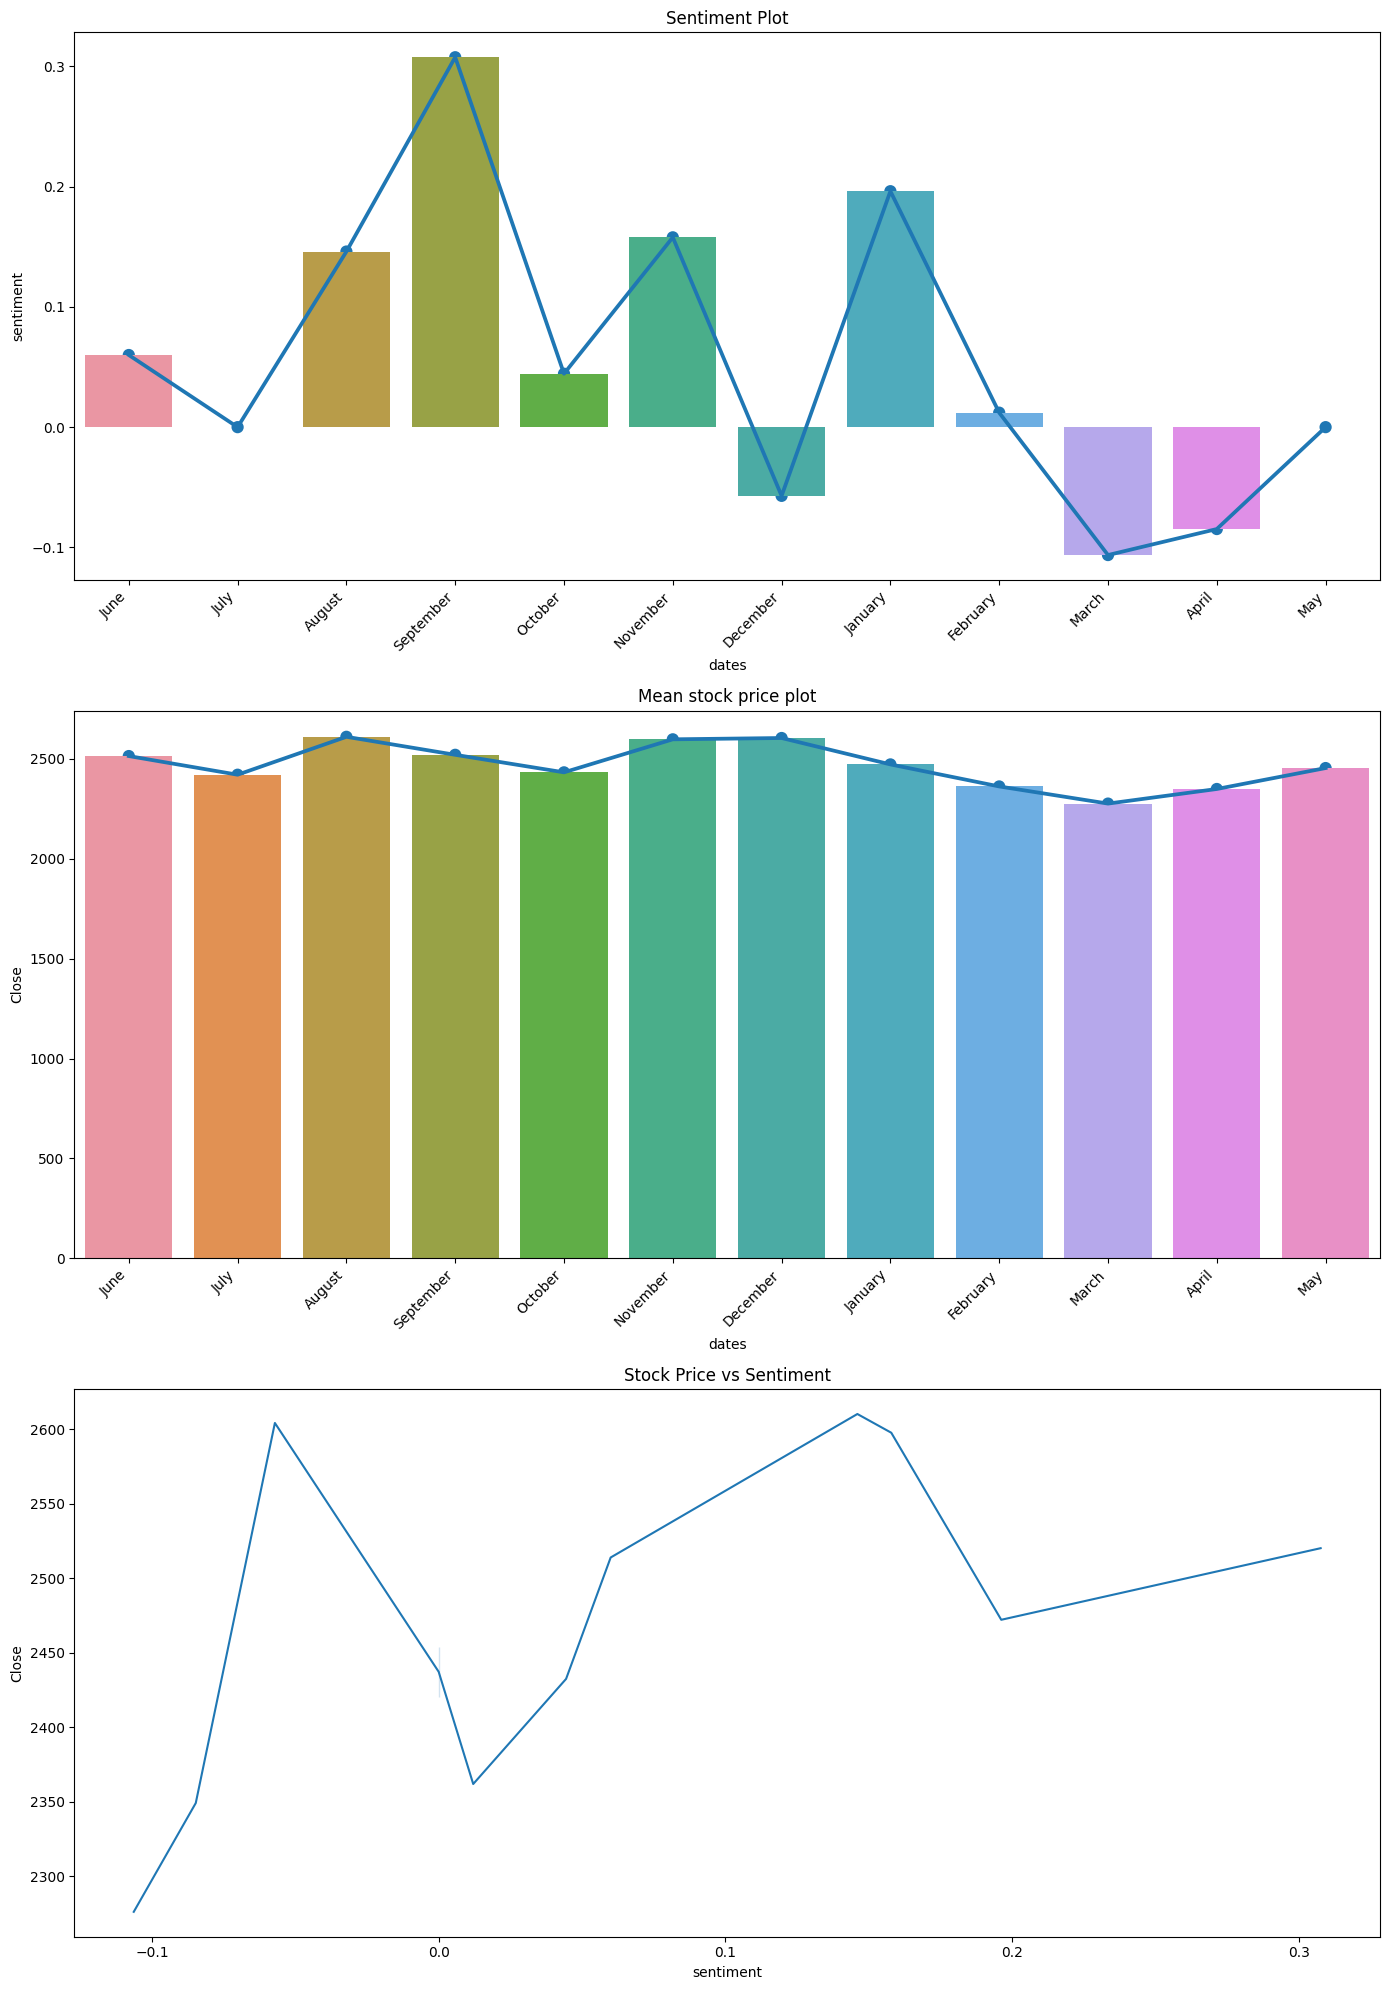

In [13]:
from Plotter import plotter as plot
img = plot('reliance')

In [74]:
import pandas as pd
df = pd.read_csv('./data/Tickers.csv',header=None)
stock_lists = list(df[0])
stock_lists = [stock_name.split('.')[0] for stock_name in stock_lists]

In [76]:
len(stock_lists)

1243

TypeError: 'format' is an invalid keyword argument for print()

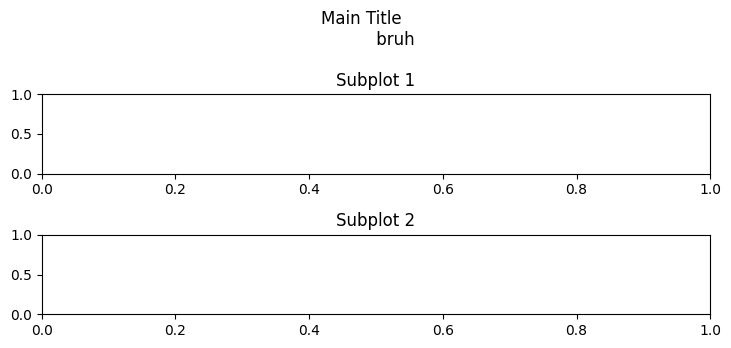

In [73]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(2)

# Add suptitle
fig.suptitle('''Main Title
             bruh''')
# fig.suptitle('bruh')
# Add individual titles to subplots
axs[0].set_title('Subplot 1')
axs[1].set_title('Subplot 2')

# Add a title after suptitle
# plt.title('Additional Title')

# Display the plot
plt.show()


In [17]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=NSE:SBIN&apikey=O52CQCBD4JABYOL2'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'Invalid inputs. Please refer to the API documentation https://www.alphavantage.co/documentation#newsapi and try again.'}


In [8]:
import pandas as pd
df = pd.DataFrame(data)

In [11]:
df

,items,sentiment_score_definition,relevance_score_definition,feed
0,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Meta's AI Breakthrough: Defying Use...
1,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Nvidia barrels toward rare $1 trill...
2,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'SNAP: Is Snap Inc. ( SNAP ) a Buy...
3,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...","{'title': 'Nearly 200,000 tech employees fired..."
4,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Netflix ( NFLX ) Rolls Out Paid S...
5,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Amazon ( AMZN ) Strengthens Table...
6,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Apple Close to Reclaiming $3T Marke...
7,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...","{'title': 'Company News for May 24, 2023', 'ur..."
8,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': 'Invest Like Taylor Swift For 10% Di...
9,50,x <= -0.35: Bearish; -0.35 < x <= -0.15: Somew...,"0 < x <= 1, with a higher score indicating hig...",{'title': '5 High-Flying Tech Stocks With Soli...
